<a href="https://colab.research.google.com/github/shamim237/Bangla-Sign-digit-recognition/blob/main/RF_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,  GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras.models import load_model, Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
SIZE = 128

In [ ]:
# train_images = []
# train_labels = [] 

# for directory_path in glob.glob("/content/drive/MyDrive/digit_final_data/train/*"):
#     label = directory_path.split("/")[-1]
#     print(label)
#     for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
#         print(img_path)
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#         train_images.append(img)
#         train_labels.append(label)

# #Convert lists to arrays        
# train_images = np.array(train_images)
# train_labels = np.array(train_labels)

In [ ]:
import pickle
# pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_train.pickle', 'wb')
# pickle.dump(train_images, pick_in)
# pick_in.close()

In [ ]:
pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_train.pickle', 'rb')
train_images = pickle.load(pick_in)
pick_in.close()

In [ ]:
pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_train_labels.pickle', 'rb')
train_labels = pickle.load(pick_in)
pick_in.close()

In [ ]:
# import pickle
# pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_train_labels.pickle', 'wb')
# pickle.dump(train_labels, pick_in)
# pick_in.close()

In [ ]:
# test_images = []
# test_labels = [] 

# for directory_path in glob.glob("/content/drive/MyDrive/digit_final_data/validation/*"):
#     im_label = directory_path.split("/")[-1]
#     for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#         test_images.append(img)
#         test_labels.append(im_label)

# #Convert lists to arrays                
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)

In [ ]:
# pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_test.pickle', 'wb')
# pickle.dump(test_images, pick_in)
# pick_in.close()

In [ ]:
pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_test.pickle', 'rb')
test_images = pickle.load(pick_in)
pick_in.close()

In [ ]:
# pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_test_label.pickle', 'wb')
# pickle.dump(test_labels, pick_in)
# pick_in.close()

In [ ]:
pick_in = open('/content/drive/MyDrive/Colab Notebooks/Thesis/data_test_label.pickle', 'rb')
test_labels = pickle.load(pick_in)
pick_in.close()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
# x_train = np.load('/content/drive/MyDrive/Colab Notebooks/x_train(RF_cnn).npy')
# x_test = np.load('/content/drive/MyDrive/Colab Notebooks/x_test(RF_cnn).npy')
# y_train = np.load('/content/drive/MyDrive/Colab Notebooks/y_train(RF_cnn).npy')
# y_test = np.load('/content/drive/MyDrive/Colab Notebooks/y_test(RF_cnn).npy')

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
xcept_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
x = xcept_model.output  #
x = GlobalAveragePooling2D()(x) # convert data into flattern for Dense layer

#x = Flatten()(x) #add fully connected layer
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
# lets build the model
model = Model(inputs=xcept_model.input, outputs=predictions)

In [ ]:
for layer in model.layers[:40]:
   layer.trainable = False
for layer in model.layers[:40]:
   layer.trainable = True

In [ ]:
# incpt_model.summary()

In [ ]:
# model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',  metrics=['accuracy'])
# history= model.fit(x_train, y_train, 
#                    #steps_per_epoch= 250, 
#                    validation_data= (x_test, y_test), 
#                    verbose = 1, 
#                    epochs = 10, 
#                    batch_size = 64)

In [ ]:
#model.save('/content/drive/MyDrive/Colab Notebooks/Thesis/Xception.h5')

In [ ]:
base_model = load_model('/content/drive/MyDrive/Colab Notebooks/Thesis/Xception.h5')

In [ ]:
base_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
layer = 'add_35'

x = base_model.get_layer(layer).output
x = GlobalAveragePooling2D()(x) # convert data into flattern for Dense layer

model = Model(inputs = base_model.input, outputs = x)

In [ ]:
feature_extractor = model.predict(x_train)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
X_for_RF = features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

In [ ]:
RF_model.fit(X_for_RF, np.argmax(y_train, axis=1))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
score = RF_model.score(X_for_RF, np.argmax(y_train,axis=1))
print(score)

1.0


In [ ]:
X_test_feature = model.predict(x_test)

In [ ]:
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
prediction_RF = RF_model.predict(X_test_features)

In [ ]:
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.9783653846153846


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
print(cm)

[[185   0   0   1   6   0  20   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   0]
 [  0   0   0 106   0   0   0   0   0   0]
 [  0   0   0   0 108   0   0   0   0   0]
 [  0   0   0   0   0 109   0   0   0   0]
 [  0   0   0   0   0   0 104   0   0   0]
 [  0   0   0   0   0   0   0 103   0   0]
 [  0   0   0   0   0   0   0   0 106   0]
 [  0   0   0   0   0   0   0   0   0 176]]


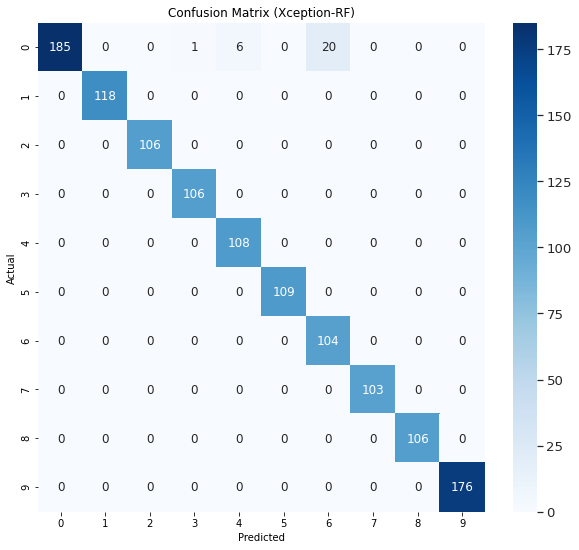

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


data = confusion_matrix(test_labels, prediction_RF)
df_cm = pd.DataFrame(data, columns=np.unique(test_labels), index = np.unique(test_labels))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix (Xception-RF)')
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,fmt= 'g' ,annot_kws={"size": 12})# font size